# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/n/udacity/CarND-Traffic-Sign-Classifier-Project/train.p'
testing_file = '/home/n/udacity/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[1])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

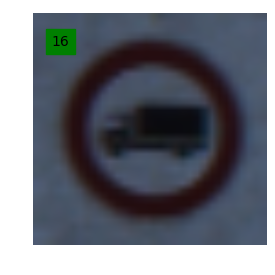

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize = (3,3))
plt.axis('on')
ind_plot = np.random.randint(1,len(y_train))
plt.imshow(X_train[ind_plot])
plt.text(2,4,str(y_train[ind_plot]),
color='k',backgroundcolor='g')
plt.axis('off')
plt.show()

In [7]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

In [8]:
import pandas as pd
data_pd = pd.read_csv('signnames.csv')

<Container object of 43 artists>

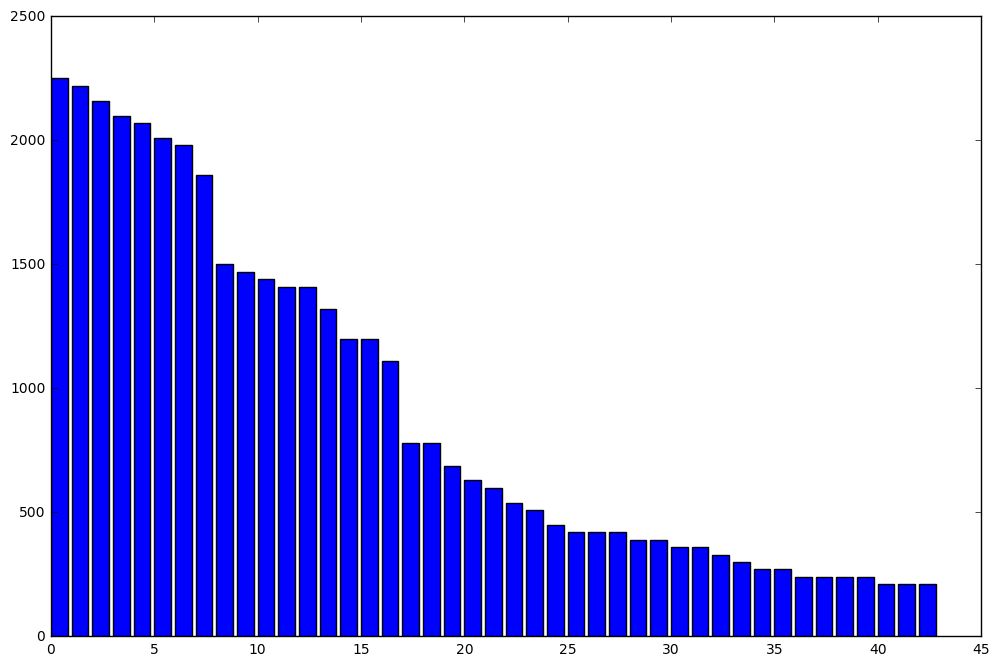

In [9]:
data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0]).reset_index()
plt.figure(figsize=(12,8))
plt.bar(range(43),height=data_pd_sorted["Occurance"])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [11]:
import cv2
def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

In [12]:
img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


# I applied the following preprocessing for image data,
# I first applied histogram equalization so the effect of brightness is removed. I used openCV'2 cv2
# I then scaled images between -.5 and .5, by dividing by 255. and subtracting .5.

In [14]:
img_resize = 32
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels
def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    image = pre_process_image(image)
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
        #print(ind_i)
    return dict_indices

def gen_transformed_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
   
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train))
    X_arr = []
    Y_arr = []
    for i in range(n_class):
        len_i = len(dict_indices[i])
        ind_rand = np.random.randint(0,len_i,n_each)
        ind_dict_class  = dict_indices[i]
       
        for i_n in range(n_each):
            img_trf = transform_image(X_train[ind_dict_class[ind_rand[i_n]]],
                                     ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(i)
           
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
   
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
       
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr


def gen_extra_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
    
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train)) 
    X_arr = []
    Y_arr = []
    n_train = len(X_train)
    for i in range(n_train):
        #X_arr.append(transform_image(X_train[i],0,0,0)/255.)
        #Y_arr.append(y_train[i])
        for i_n in range(n_each):
            img_trf = transform_image(X_train[i],
                                      ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(y_train[i])
            
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
    
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
        
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr

/home/n/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:

Image_train_GS_rot,y_train_rot,labels_train_rot = gen_transformed_data(X_train,y_train,
                                                                       43,10,30,5,5,1)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

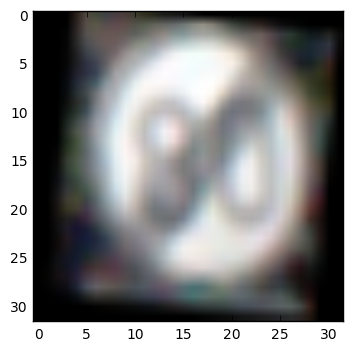

In [16]:
#Splitting data into training and validation set: I first split the data into training and validation sets using sklearn's test_train_split function.
#I split the data so 10% of the data was validation data and 90% was training data.

def random_batch():
    # Number of images in the training-set.
    num_images = len(Image_train_GS_rot_1)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    features_batch = Image_train_GS_rot_1[idx, :,:,:]
    labels_batch = labels_train_rot[idx, :]

    return features_batch, labels_batch
def get_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def get_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def conv_layer(input,
               num_inp_channels,
               filter_size,
               num_filters,
              use_pooling):
    shape = [filter_size, filter_size, num_inp_channels,num_filters]
    weights = get_weights(shape)
    biases = get_biases(num_filters)
    layer = tf.nn.conv2d(input = input,
                        filter = weights,
                        strides = [1,1,1,1],
                        padding = 'SAME')

    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                         ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1],
                         padding='SAME')
    layer = tf.nn.relu(layer)
    
    return layer, weights
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features
def fc_layer(input,          # The previous layer.
             num_inputs,     # Num. inputs from prev. layer.
             num_outputs,    # Num. outputs.
             use_relu=True): # Use Rectified Linear Unit (ReLU)?
    weights = get_weights(shape=[num_inputs, num_outputs])
    biases = get_biases(length=num_outputs)
    layer = tf.matmul(input, weights) + biases

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer,weights

def dropout_layer(layer, keep_prob):
    layer_drop = tf.nn.dropout(layer, keep_prob)
    return layer_drop

img_size = 32
num_channels = 3 
Image_train_GS_rot_1 = Image_train_GS_rot
image_GS_test_1 = image_GS_test

plt.imshow(Image_train_GS_rot_1[5]+.5);

In [17]:
import tensorflow as tf
features = tf.placeholder(tf.float32, shape=[None, img_size, img_size,num_channels], 
                   name='features')
labels_true = tf.placeholder(tf.float32,shape=[None,N_classes], name='y_true')

labels_true_cls = tf.argmax(labels_true, dimension=1)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.

## Convlayer 0
filter_size0 = 1
num_filters0 = 3

## Convlayer 1
filter_size1 = 5
num_filters1 = 32
## Convlayer 2
filter_size2 = 5
num_filters2 = 32

## Convlayer 3
filter_size3 = 5
num_filters3 = 64
## Convlayer 4
filter_size4 = 5
num_filters4 = 64

## Convlayer 5
filter_size5 = 5
num_filters5 = 128
## Convlayer 6
filter_size6 = 5
num_filters6 = 128

## FC_size 
fc_size1 = 1024
## FC_size 
fc_size2 = 1024

## Dropout
#drop_prob = 0.5

keep_prob = tf.placeholder(tf.float32)

In [19]:
layer_conv0, weights_conv0 = \
        conv_layer(input=features,
                   num_inp_channels=num_channels,
                   filter_size=filter_size0,
                   num_filters=num_filters0,
                   use_pooling=False)

layer_conv1, weights_conv1 = \
        conv_layer(input=layer_conv0,
                   num_inp_channels=num_filters0,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=False)
layer_conv2, weights_conv2 = \
        conv_layer(input=layer_conv1,
                   num_inp_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)
layer_conv2_drop = dropout_layer(layer_conv2, keep_prob)
    
layer_conv3, weights_conv3 = \
        conv_layer(input=layer_conv2_drop,
                   num_inp_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False)
layer_conv4, weights_conv4= \
        conv_layer(input=layer_conv3,
                   num_inp_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True)
layer_conv4_drop = dropout_layer(layer_conv4, keep_prob)

layer_conv5, weights_conv5 = \
        conv_layer(input=layer_conv4_drop,
                   num_inp_channels=num_filters4,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=False)
layer_conv6, weights_conv6 = \
        conv_layer(input=layer_conv5,
                   num_inp_channels=num_filters5,
                   filter_size=filter_size6,
                   num_filters=num_filters6,
                   use_pooling=True)    
layer_conv6_drop = dropout_layer(layer_conv6, keep_prob)


layer_flat2, num_fc_layers2 = flatten_layer(layer_conv2_drop)
layer_flat4, num_fc_layers4 = flatten_layer(layer_conv4_drop)
layer_flat6, num_fc_layers6 = flatten_layer(layer_conv6_drop)

layer_flat = tf.concat(1, [layer_flat2, layer_flat4, layer_flat6])
num_fc_layers = num_fc_layers2+num_fc_layers4+num_fc_layers6

fc_layer1,weights_fc1 = fc_layer(layer_flat,          # The previous layer.
             num_fc_layers,     # Num. inputs from prev. layer.
             fc_size1,    # Num. outputs.
             use_relu=True)
fc_layer1_drop = dropout_layer(fc_layer1, keep_prob)

fc_layer2,weights_fc2 = fc_layer(fc_layer1_drop,          # The previous layer.
             fc_size1,     # Num. inputs from prev. layer.
             fc_size2,    # Num. outputs.
             use_relu=True)
fc_layer2_drop = dropout_layer(fc_layer2, keep_prob)

fc_layer3,weights_fc3 = fc_layer(fc_layer2_drop,          # The previous layer.
             fc_size2,     # Num. inputs from prev. layer.
             n_classes,    # Num. outputs.
             use_relu=False)

labels_pred = tf.nn.softmax(fc_layer3)
labels_pred_cls = tf.argmax(labels_pred, dimension=1)

regularizers = (tf.nn.l2_loss(weights_conv0) 
                + tf.nn.l2_loss(weights_conv1) + tf.nn.l2_loss(weights_conv2) 
                + tf.nn.l2_loss(weights_conv3) + tf.nn.l2_loss(weights_conv4) 
                + tf.nn.l2_loss(weights_conv5) + tf.nn.l2_loss(weights_conv6) 
                + tf.nn.l2_loss(weights_fc1)  + tf.nn.l2_loss(weights_fc2) +
                tf.nn.l2_loss(weights_fc3))

In [20]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc_layer3,
                                                        labels=labels_true)

In [21]:
cost = tf.reduce_mean(cross_entropy)+1e-5*regularizers

In [22]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [23]:
correct_prediction = tf.equal(labels_pred_cls, labels_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
batch_size = 100

In [25]:
def optimize(num_iterations):
    global total_iterations
    global best_validation_accuracy
    global last_improvement
    global best_test_accuracy
    
    global val_acc_list
    global batch_acc_list
    global test_acc_list
    
    #num_iter = np.math.floor(len(labels_train_rot)/batch_size)
    #num_iter = min(num_iter-2,num_iterations)
    num_iter = num_iterations
    for i in range(num_iter):
        total_iterations+=1
        # Get batch for training
        features_batch, labels_true_batch = random_batch()
        #idx = np.arange(batch_size*i,batch_size*(i+1))
        #features_batch = Image_GS_train_rot[idx, :,:,:]
        #labels_true_batch = labels_train_rot[idx, :]f
        feed_dict_batch = {features:features_batch,
                            labels_true: labels_true_batch,
                            keep_prob: 0.5}
        session.run(optimizer,feed_dict = feed_dict_batch)
        
        if ((total_iterations % 200 == 0) or (i == (num_iter - 1))):
            # Calculate the accuracy on the training-set.
            acc_batch = session.run(accuracy, feed_dict=feed_dict_batch)
            acc_valid = session.run(accuracy,feed_dict=feed_dict_valid)
            val_acc_list.append(acc_valid)
            batch_acc_list.append(acc_batch)
            if acc_valid > best_validation_accuracy:
                best_validation_accuracy = acc_valid
                last_improvement = total_iterations
                improved_str = '*'
                saver = tf.train.Saver()
                saver.save(sess=session, save_path='model_best_batch')
            else:
                improved_str = ''
            
            if total_iterations - last_improvement > require_improvement:
                print("No improvement found in a while, stopping optimization.")
                break

            # Message for printing.
            if ((total_iterations % 5000 == 0) or (i == (num_iter - 1))):
                msg = "# {0:>6}, Train Acc.: {1:>6.1%}, Val Acc.: {2:>6.1%}, Test Acc.: {3:>6.1%}"
                acc_test = session.run(accuracy,feed_dict=feed_dict_test)
                
                if best_test_accuracy<acc_test:
                    saver = tf.train.Saver()
                    saver.save(sess=session, save_path='model_best_test')
                    best_test_accuracy = acc_test
                    #print_accuracy()
                # Print it.
                print(msg.format(i+1, acc_batch,acc_valid,
                                     acc_test))

In [26]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print("Accuracy on test set: {0:>6.1%}".format(acc))
    
def print_confusion_matrix():
    labels_cls_pred = session.run(labels_pred_cls,feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true = y_test,y_pred = labels_cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(N_classes)
    plt.xticks(tick_marks, range(N_classes))
    plt.yticks(tick_marks, range(N_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_error_examples():
    correct,labels_cls_pred = session.run([correct_prediction,labels_pred_cls],
                                          feed_dict=feed_dict_test)
    incorrect = (correct == False)
    X_incorrect = X_test[incorrect]
    y_incorrect = y_test[incorrect]
    y_pred = labels_cls_pred[incorrect]
    
    plot_random_3C(3,3,X_incorrect,y_incorrect)

def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<13:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(image_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [27]:
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)

feed_dict_test = {features: image_GS_test_1,
                 labels_true: labels_test,
                 labels_true_cls:y_test,
                 keep_prob:1.0}

In [ ]:
session = tf.Session()
session.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
print_accuracy()

In [ ]:
val_acc_list = []
batch_acc_list = []
train_acc_list = []

In [ ]:
batch_size = 512

In [ ]:
start_time = time.time()
total_iterations = 0
require_improvement = 10000
ang_rot = 10
trans_rot = 2
shear_rot = 2
n_opt = 40000
best_test_accuracy = 0.0
    
for i_train in range(1):
    best_validation_accuracy = 0.0
    last_improvement = 0

    #Image_train_GS_rot,y_train_rot,labels_train_rot = gen_transformed_data(X_train,y_train,43,5000,30,5,5,1)
    
    
    if i_train>-1:
        ang_rot = 10*0.9**(i_train)
        trans_rot = 2*0.9**(i_train)
        shear_rot = 2*0.9**(i_train)
        require_improvement = 5000
        n_opt = 10000
        

        
        
    X_train_SS, X_valid_SS, y_train_SS , y_valid_SS = \
                                train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.1,
                                                 random_state=22)
    labels_valid_SS = OHE_labels(y_valid_SS,43)
    image_GS_valid = np.array([pre_process_image(X_valid_SS[i]) for i in range(len(X_valid_SS))],
                          dtype = np.float32)
    #image_GS_valid = np.reshape(image_GS_valid,(-1,32,32,1))
    
    feed_dict_valid = {features: image_GS_valid,
                 labels_true: labels_valid_SS,
                 labels_true_cls:y_valid_SS,
                 keep_prob:1.0}

    Image_train_GS_rot,y_train_rot,labels_train_rot = gen_extra_data(X_train_SS,y_train_SS,43,5,
                                                                     ang_rot,trans_rot,shear_rot,1)
    print('Optimization Loop # '+str(i_train))    
    Image_train_GS_rot_1 = Image_train_GS_rot 
    #np.reshape(Image_train_GS_rot,(-1,32,32,1))
    #
    optimize(n_opt)
    #print_accuracy()
    
    
end_time = time.time()

time_diff = end_time-start_time

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.